In [318]:
# Code by Bhavy Kharbanda
# Sap Id: 500082531 

In [319]:
# Importing the libraries
import torch
import sklearn
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [320]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import RandomSampler, DataLoader

# make_classification to generate a random classification dataset
# train_test split to split the data in training and testing
# StandardScaler to Standardize features by removing the mean and scaling to unit variance.


In [321]:
# Importing the datset 
data = pd.read_csv ('Forest.csv')
print ("Complete Data set: ")
print(data)


Complete Data set: 
      Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          2596      51      3                               258   
1          2590      56      2                               212   
2          2804     139      9                               268   
3          2785     155     18                               242   
4          2595      45      2                               153   
...         ...     ...    ...                               ...   
4995       3281     124      7                                30   
4996       3258     122      4                                 0   
4997       3241      52     21                                42   
4998       2979      28     25                               108   
4999       3669      29     24                               105   

      Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                  0                              510   
1                

In [322]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1
0,2596,51,3,258,0,510,221,232,148,6279,1
1,2590,56,2,212,-6,390,220,235,151,6225,1
2,2804,139,9,268,65,3180,234,238,135,6121,1
3,2785,155,18,242,118,3090,238,238,122,6211,1
4,2595,45,2,153,-1,391,220,234,150,6172,1


In [323]:
# Selecting the dataset for X and y
X = data.iloc[:,:]
y = data.iloc[:,10:]
print(X.shape)
print(y.shape)

(5000, 11)
(5000, 1)


In [324]:
# Printing the final dataset
print(X)
print(y)

      Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          2596      51      3                               258   
1          2590      56      2                               212   
2          2804     139      9                               268   
3          2785     155     18                               242   
4          2595      45      2                               153   
...         ...     ...    ...                               ...   
4995       3281     124      7                                30   
4996       3258     122      4                                 0   
4997       3241      52     21                                42   
4998       2979      28     25                               108   
4999       3669      29     24                               105   

      Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                  0                              510   
1                                 -6 

In [325]:
# Change it into the Tensor objects
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32)

In [326]:
# Direct function in sklearn to split the dataset
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.3, random_state=4)
print("Size of training dataset: ")
print(X_train.shape)
print("Size of testing dataset: ")
print(X_test.shape)



Size of training dataset: 
torch.Size([3500, 11])
Size of testing dataset: 
torch.Size([1500, 11])


In [327]:
# Initializing the values
class NNpt(nn.Module):
    def __init__(self, n_features):
        super(NNpt, self).__init__()
        self.linear = nn.Linear(n_features, 1)

        self.linear.weight.detach().zero_()
        self.linear.bias.detach().zero_()

    def forward(self, x):
        out = self.linear(x)
        return out.view(-1)


def loss_fn(yhat, y):
    return torch.mean((yhat-y)**2)


In [328]:
# Driving function
def train(model, x, y, n_epoch=10, lr=0.01, seed=23, bsz=20):

    cost = []
    torch.manual_seed(seed)
    # To optimize our algorithm
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    for i in range(n_epoch):
        suffle_idx = torch.randperm(y.size(0))
        batches = torch.split(suffle_idx, bsz)

        for idx in batches:
            # 1. Compute the Output
            yhat = model.forward(x[idx])

            # 2. Compute the Loss
            loss = torch.nn.functional.mse_loss(yhat, y[idx])

            # 3. Compute the Gradients
            optimizer.zero_grad()
            loss.backward()

            # 4. Update the Model Parameters
            optimizer.step()

            # model.weight=model.weight-lr*grad_w
            # model.bias=model.bias-lr*grad_b

        # 5. Log and print the Loss
        with torch.no_grad():
            yhat = model.forward(x)
            curr_loss = loss_fn(yhat, y)
            print('Epoc: %3d ' % (i+1), end="")
            print('| MSE % .5f' % curr_loss)
            cost.append(curr_loss)

    return cost


In [329]:
n_feature = X_train.size(1)
model = NNpt(n_features=n_feature)
# Calling the model
cost = train(model, X_train, y_train, n_epoch=50)


Epoc:   1 | MSE  nan


C:\Users\bhavy\AppData\Local\Temp\ipykernel_18340\5868854.py:17: UserWarning: Using a target size (torch.Size([20, 1])) that is different to the input size (torch.Size([20])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = torch.nn.functional.mse_loss(yhat, y[idx])


Epoc:   2 | MSE  nan
Epoc:   3 | MSE  nan
Epoc:   4 | MSE  nan
Epoc:   5 | MSE  nan
Epoc:   6 | MSE  nan
Epoc:   7 | MSE  nan
Epoc:   8 | MSE  nan
Epoc:   9 | MSE  nan
Epoc:  10 | MSE  nan
Epoc:  11 | MSE  nan
Epoc:  12 | MSE  nan
Epoc:  13 | MSE  nan
Epoc:  14 | MSE  nan
Epoc:  15 | MSE  nan
Epoc:  16 | MSE  nan
Epoc:  17 | MSE  nan
Epoc:  18 | MSE  nan
Epoc:  19 | MSE  nan
Epoc:  20 | MSE  nan
Epoc:  21 | MSE  nan
Epoc:  22 | MSE  nan
Epoc:  23 | MSE  nan
Epoc:  24 | MSE  nan
Epoc:  25 | MSE  nan
Epoc:  26 | MSE  nan
Epoc:  27 | MSE  nan
Epoc:  28 | MSE  nan
Epoc:  29 | MSE  nan
Epoc:  30 | MSE  nan
Epoc:  31 | MSE  nan
Epoc:  32 | MSE  nan
Epoc:  33 | MSE  nan
Epoc:  34 | MSE  nan
Epoc:  35 | MSE  nan
Epoc:  36 | MSE  nan
Epoc:  37 | MSE  nan
Epoc:  38 | MSE  nan
Epoc:  39 | MSE  nan
Epoc:  40 | MSE  nan
Epoc:  41 | MSE  nan
Epoc:  42 | MSE  nan
Epoc:  43 | MSE  nan
Epoc:  44 | MSE  nan
Epoc:  45 | MSE  nan
Epoc:  46 | MSE  nan
Epoc:  47 | MSE  nan
Epoc:  48 | MSE  nan
Epoc:  49 | M

[]

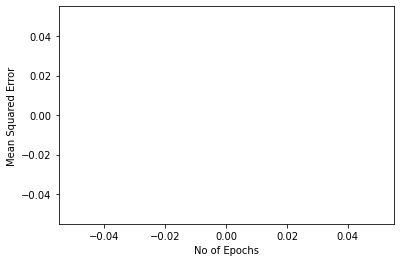

In [330]:
import matplotlib.pyplot as plt
plt.plot(range(len(cost)), cost)
plt.xlabel('No of Epochs')
plt.ylabel('Mean Squared Error')
plt.plot()

In [331]:
ones=torch.ones(y_train.size(0))
zero=torch.zeros(y_train.size(0))
train_pred=model.forward(X_train)

train_acc=torch.mean((torch.where( train_pred >0.5 , ones,zero).int()==y_train).float())
#print(train_acc)

ones=torch.ones(y_test.size(0))
zero=torch.zeros(y_test.size(0))
test_pred=model.forward(X_test)

test_acc=torch.mean((torch.where( test_pred >0.5 , ones,zero).int()==y_test).float())
print("Accuracy for Model ")
print('Training Accuracy: %.2f' % (train_acc*100),'%')
print('Testing Accuracy: %.2f' % (test_acc*100),'%')

Accuracy for Model 
Training Accuracy: 56.43 %
Testing Accuracy: 56.73 %
